<a href="https://colab.research.google.com/github/soumyasinghh/btc/blob/main/bitcoin_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bitcoin price prediction using time series forecasting

importing drive contents for getting the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using 5 year historical data from https://finance.yahoo.com/quote/BTC-INR/history/?period1=1556342833&period2=1714195622

In INR.
From 2019-2024

In [ ]:
# Import pandas
import pandas as pd
import numpy as np
# Read in the data and parse the dates
df = pd.read_csv("/content/drive/MyDrive/BTC-INR.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date coulmn and make column 1 as datetime
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-27,368781.62500,370971.84375,365579.9375,368005.93750,368005.93750,915861869880
2019-04-28,368247.31250,372053.28125,367113.6250,369177.31250,369177.31250,895501546630
2019-04-29,369157.71875,371015.03125,364224.1875,366381.84375,366381.84375,959042533943
2019-04-30,366407.90625,373100.37500,363426.0000,372228.65625,372228.65625,965504049541
2019-05-01,372241.71875,376957.28125,372450.1875,376259.50000,376259.50000,952682017018


https://finance.yahoo.com/quote/BTC-INR/history/?period1=1556764376&period2=1714617168
Past five yrs to today


In [ ]:
# Import pandas
import pandas as pd
import numpy as np
# Read in the data and parse the dates
df = pd.read_csv("/content/drive/MyDrive/BTC-INR-L.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date coulmn and make column 1 as datetime
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-02,376240.40625,383399.65625,375181.31250,382256.06250,382256.06250,1016829356400
2019-05-03,382274.71875,406843.65625,381208.87500,399038.71875,399038.71875,1295066119240
2019-05-04,399101.90625,407243.53125,390542.28125,403388.50000,403388.50000,1215303937800
2019-05-05,403381.65625,403574.96875,394870.46875,400935.00000,400935.00000,1024443988570
2019-05-06,400657.25000,402103.84375,392272.62500,398887.59375,398887.59375,1092321816080


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-28,5316989.0,5329280.0,5206374.5,5289312.0,5289312.0,1628915155868
2024-04-29,5289676.5,5364569.5,5237089.5,5263803.5,5263803.5,1445768615708
2024-04-30,5263231.0,5355480.0,5157724.5,5327187.5,5327187.5,2222619086471
2024-05-01,5327045.5,5398163.5,4935319.5,5063095.0,5063095.0,3159658605554
2024-05-02,4859911.0,4879195.0,4752952.0,4776094.5,4776094.5,4123873509376


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-02,376240.40625,383399.65625,375181.31250,382256.06250,382256.06250,1016829356400
2019-05-03,382274.71875,406843.65625,381208.87500,399038.71875,399038.71875,1295066119240
2019-05-04,399101.90625,407243.53125,390542.28125,403388.50000,403388.50000,1215303937800
2019-05-05,403381.65625,403574.96875,394870.46875,400935.00000,400935.00000,1024443988570
2019-05-06,400657.25000,402103.84375,392272.62500,398887.59375,398887.59375,1092321816080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-05-02 to 2024-05-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [ ]:
len(df)
#number of samples we have

1828

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Closing Price (INR)": "Price"})
bitcoin_prices.head()

,Close
Date,
2019-05-02,382256.06250
2019-05-03,399038.71875
2019-05-04,403388.50000
2019-05-05,400935.00000
2019-05-06,398887.59375


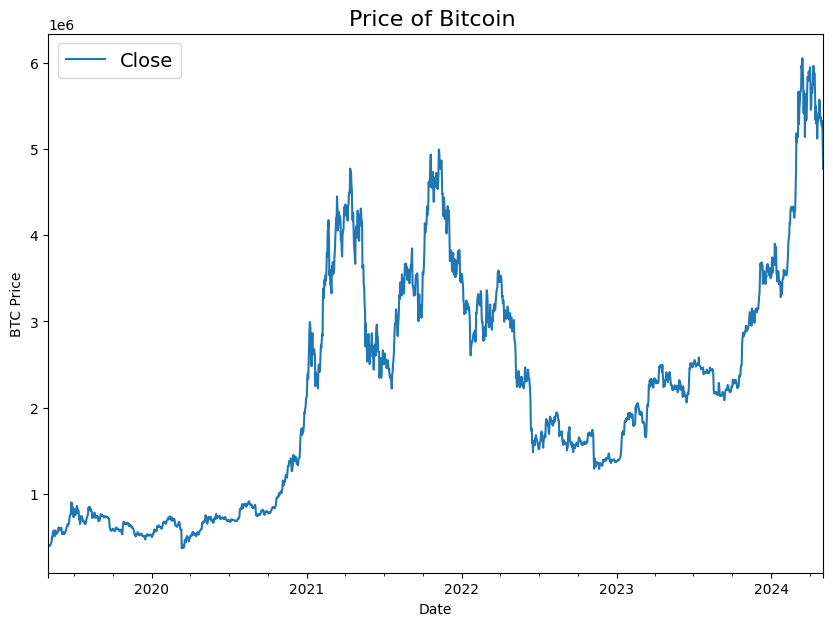

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin ", fontsize=16)
plt.legend(fontsize=14);

Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/drive/MyDrive/BTC-INR-L.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (line[0] means row 0 ), strptime = string parse time
    btc_price.append(line[2]) # get the closing price

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2019, 5, 2, 0, 0),
  datetime.datetime(2019, 5, 3, 0, 0),
  datetime.datetime(2019, 5, 4, 0, 0),
  datetime.datetime(2019, 5, 5, 0, 0),
  datetime.datetime(2019, 5, 6, 0, 0),
  datetime.datetime(2019, 5, 7, 0, 0),
  datetime.datetime(2019, 5, 8, 0, 0),
  datetime.datetime(2019, 5, 9, 0, 0),
  datetime.datetime(2019, 5, 10, 0, 0),
  datetime.datetime(2019, 5, 11, 0, 0)],
 ['383399.656250',
  '406843.656250',
  '407243.531250',
  '403574.968750',
  '402103.843750',
  '416720.312500',
  '417621.500000',
  '434049.656250',
  '450329.281250',
  '512815.250000'])

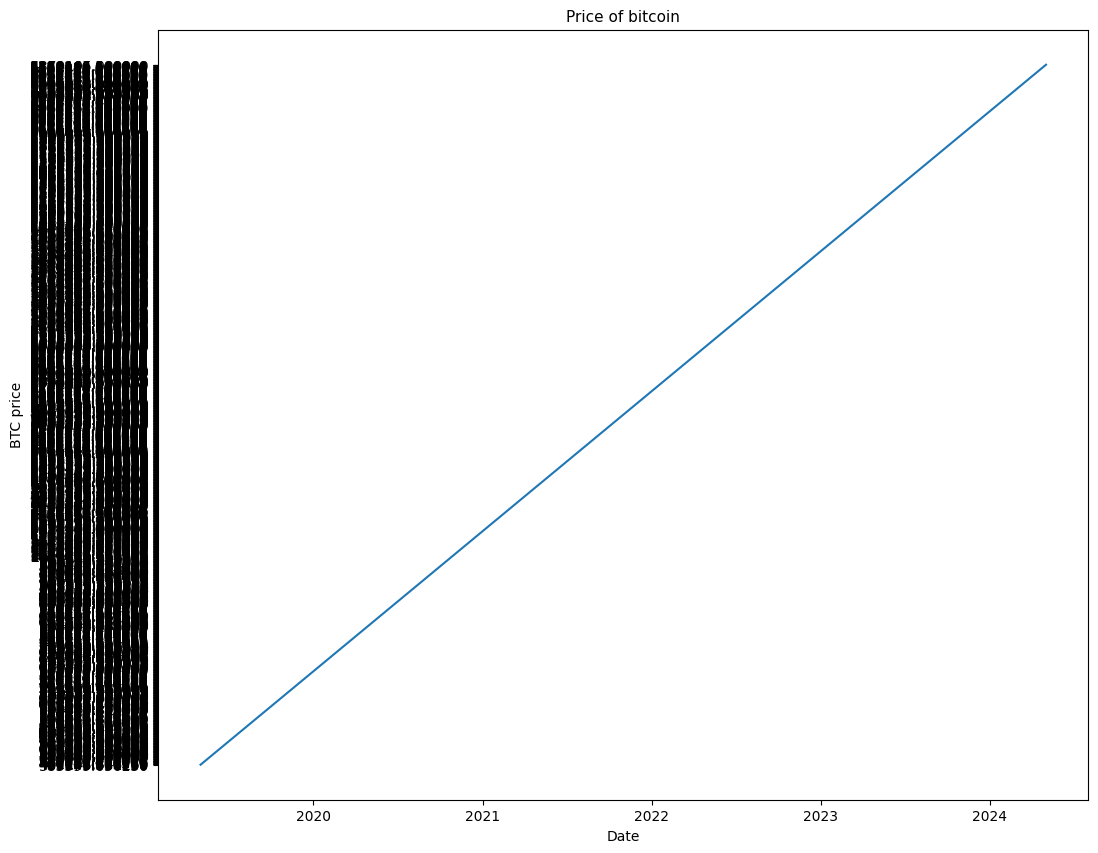

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(12,10))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.title("Price of bitcoin", fontsize= 11);

In [ ]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2019-05-02T00:00:00.000000000', '2019-05-03T00:00:00.000000000',
        '2019-05-04T00:00:00.000000000', '2019-05-05T00:00:00.000000000',
        '2019-05-06T00:00:00.000000000', '2019-05-07T00:00:00.000000000',
        '2019-05-08T00:00:00.000000000', '2019-05-09T00:00:00.000000000',
        '2019-05-10T00:00:00.000000000', '2019-05-11T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([382256.0625 , 399038.71875, 403388.5    , 400935.     ,
        398887.59375, 405856.3125 , 417096.9375 , 433452.21875,
        446088.84375, 503847.6875 ]))

Univariate time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.
Multivariate time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1462, 366, 1462, 366)

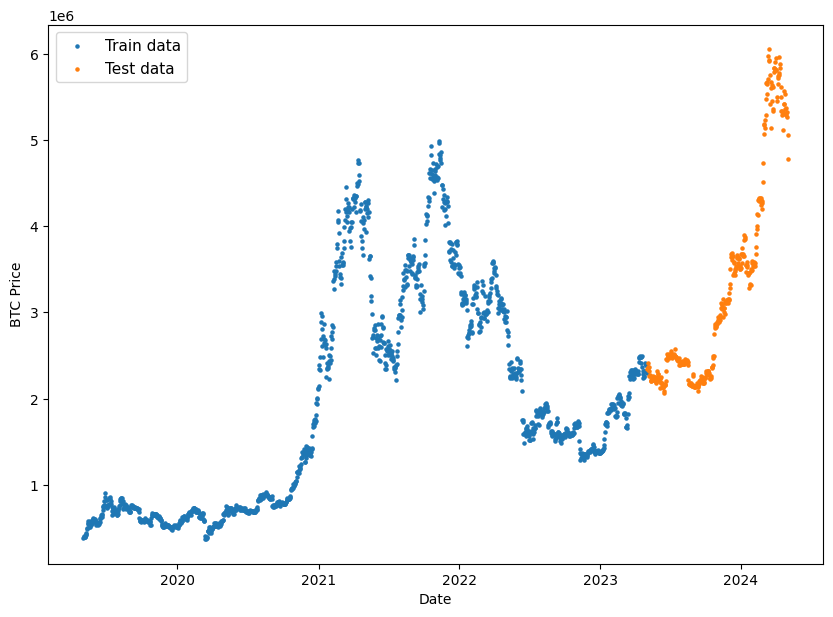

In [ ]:
#Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=11)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

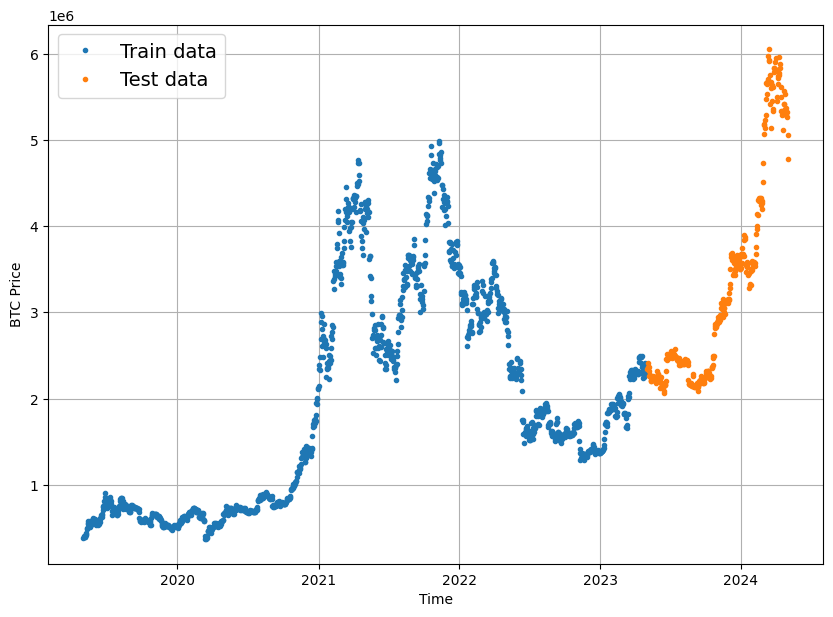

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Modelling Experiments
Can build any kind of model ---> inputs and outputs should be perfectly formatted. It does not guarantee well functioning in production settings though. We are just experimenting with models and testing accuracy.

Horizon and window -->>

horizon = number of timesteps to predict into future
window = number of timesteps from past used to predict horizon
For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.


THE EXPERIMENTS:
model type, horizon and window->

0	Naïve model (baseline)

1	Dense model	1	  7

2	Dense model. 	1	  30

3	Dense model. 	7	  30

4	Conv1D	1  	7

5	LSTM	1	 7

6 Dense model. 1   7

7 N-Beats Algorithm 1   7

Model 0: Naïve forecast (baseline)
Requires no training. In simpler words, the starting point of the project by setting performance benchmarks and providing a steady reference point, they streamline the iterative process, guiding advancements towards meaningful goals.
Other models like Moving Averages, ARIMA, sktime, Tensorflow Decision Forest can be also be used but we use the simplest models available as the value of naive forecast is set based upon the value of last observation.

In [ ]:
#Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View first 10 and last 10

(array([2345458.5 , 2372143.25, 2357329.5 , 2413838.  , 2362367.75,
        2325622.  , 2265099.5 , 2270933.25, 2262778.25, 2216779.75]),
 array([5413944. , 5573610.5, 5531098. , 5356859. , 5370349.5, 5317350. ,
        5289312. , 5263803.5, 5327187.5, 5063095. ]))

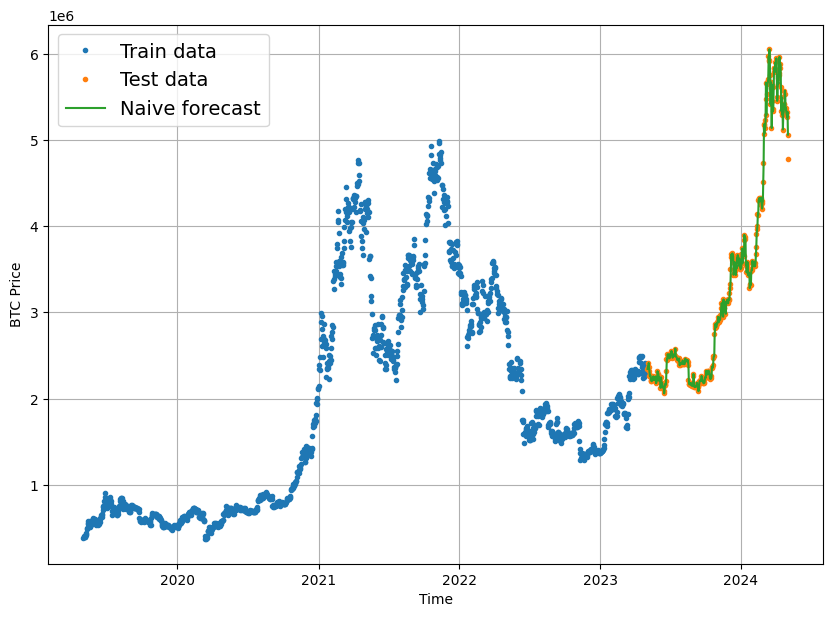

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

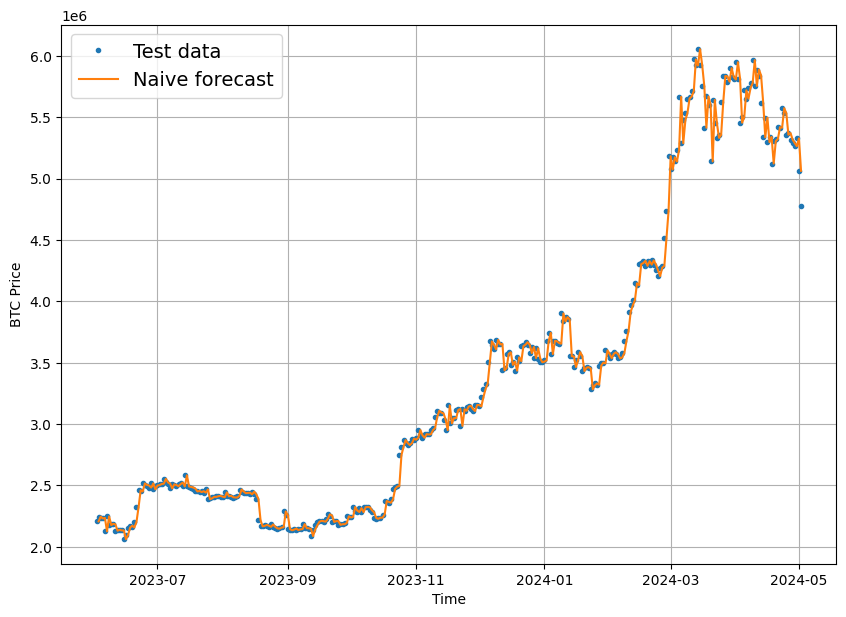

In [ ]:
plt.figure(figsize=(10, 7))
offset = 30 # offset the values by 30 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

Using Tensorflow to evaluate the model --->> regression metrics (will be used)

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 60741.344,
 'mse': 10082125000.0,
 'rmse': 100409.78,
 'mape': 1.6553322,
 'mase': 0.998462}

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

3285493.1861338797

Okay, looking at these two values is starting to give us an idea of how our model is performing:

The average price of Bitcoin in the naive test dataset is: 59532.992 (note: average may not be the best measure here)


Windowing Dataset.
Setting horizon and window @ 1 and 15 as default.

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 15 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):

  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1813, 1813)

The forecast using dense method. First three

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [382256.0625  399038.71875 403388.5     400935.      398887.59375
 405856.3125  417096.9375  433452.21875 446088.84375 503847.6875
 487595.4375  551816.625   562129.6875  576160.3125  553836.4375 ] -> Label: [516628.375]
Window: [399038.71875 403388.5     400935.      398887.59375 405856.3125
 417096.9375  433452.21875 446088.84375 503847.6875  487595.4375
 551816.625   562129.6875  576160.3125  553836.4375  516628.375  ] -> Label: [511514.9375]
Window: [403388.5     400935.      398887.59375 405856.3125  417096.9375
 433452.21875 446088.84375 503847.6875  487595.4375  551816.625
 562129.6875  576160.3125  553836.4375  516628.375   511514.9375 ] -> Label: [576237.4375]


The forecast using dense. last three.

In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [5496504.5 5296485.  5338995.5 5122489.5 5306188.  5322664.  5418612.5
 5413944.  5573610.5 5531098.  5356859.  5370349.5 5317350.  5289312.
 5263803.5] -> Label: [5327187.5]
Window: [5296485.  5338995.5 5122489.5 5306188.  5322664.  5418612.5 5413944.
 5573610.5 5531098.  5356859.  5370349.5 5317350.  5289312.  5263803.5
 5327187.5] -> Label: [5063095.]
Window: [5338995.5 5122489.5 5306188.  5322664.  5418612.5 5413944.  5573610.5
 5531098.  5356859.  5370349.5 5317350.  5289312.  5263803.5 5327187.5
 5063095. ] -> Label: [4776094.5]


Basically using 15 days data for predicting next one day. so in the above last one is predicting price of 2 april using last fifteen days close price.
the second last is  prediction of 1 using last 15 days.
So, predicting the model to be 70% efficient as it is giving the price right for 3 values.

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-28,5316989.0,5329280.0,5206374.5,5289312.0,5289312.0,1628915155868
2024-04-29,5289676.5,5364569.5,5237089.5,5263803.5,5263803.5,1445768615708
2024-04-30,5263231.0,5355480.0,5157724.5,5327187.5,5327187.5,2222619086471
2024-05-01,5327045.5,5398163.5,4935319.5,5063095.0,5063095.0,3159658605554
2024-05-02,4859911.0,4879195.0,4752952.0,4776094.5,4776094.5,4123873509376


Check for 28 ka price prediction.?????????

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1450, 363, 1450, 363)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[382256.0625 , 399038.71875, 403388.5    , 400935.     ,
         398887.59375, 405856.3125 , 417096.9375 , 433452.21875,
         446088.84375, 503847.6875 , 487595.4375 , 551816.625  ,
         562129.6875 , 576160.3125 , 553836.4375 ],
        [399038.71875, 403388.5    , 400935.     , 398887.59375,
         405856.3125 , 417096.9375 , 433452.21875, 446088.84375,
         503847.6875 , 487595.4375 , 551816.625  , 562129.6875 ,
         576160.3125 , 553836.4375 , 516628.375  ],
        [403388.5    , 400935.     , 398887.59375, 405856.3125 ,
         417096.9375 , 433452.21875, 446088.84375, 503847.6875 ,
         487595.4375 , 551816.625  , 562129.6875 , 576160.3125 ,
         553836.4375 , 516628.375  , 511514.9375 ],
        [400935.     , 398887.59375, 405856.3125 , 417096.9375 ,
         433452.21875, 446088.84375, 503847.6875 , 487595.4375 ,
         551816.625  , 562129.6875 , 576160.3125 , 553836.4375 ,
         516628.375  , 511514.9375 , 576237.4375 ],
        [398

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

modelling checkpt: values fluctuate from model to model, so to ensure fair evaluation.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

Model 1: Dense model (window = 15, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 15 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 15 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
12/12 [==============================] - 2s 92ms/step - loss: 938163.3125 - mae: 938163.3125 - val_loss: 727079.3750 - val_mae: 727079.3750
Epoch 2/100
12/12 [==============================] - 1s 53ms/step - loss: 293106.9062 - mae: 293106.9062 - val_loss: 422834.1250 - val_mae: 422834.1250
Epoch 3/100
12/12 [==============================] - 1s 45ms/step - loss: 175092.9844 - mae: 175092.9844 - val_loss: 148707.7656 - val_mae: 148707.7656
Epoch 4/100
12/12 [==============================] - 0s 43ms/step - loss: 132856.6875 - mae: 132856.6875 - val_loss: 139624.2812 - val_mae: 139624.2812
Epoch 5/100
12/12 [==============================] - 1s 52ms/step - loss: 121484.7344 - mae: 121484.7344 - val_loss: 135601.5781 - val_mae: 135601.5781
Epoch 6/100
12/12 [==============================] - 1s 48ms/step - loss: 117430.9297 - mae: 117430.9297 - val_loss: 131290.0625 - val_mae: 131290.0625
Epoch 7/100
12/12 [==============================] - 1s 45ms/step - loss: 111108.0703 - 

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 113090.1797 - mae: 113090.1797


[113090.1796875, 113090.1796875]

In [ ]:
#Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 63215.1133 - mae: 63215.1133


[63215.11328125, 63215.11328125]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

12/12 [==============================] - 0s 2ms/step


(363,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([2352126.5, 2392906. , 2379491.2, 2346805.5, 2274767. , 2261399. ,
        2248522.5, 2211853.5, 2214779. , 2203381. ], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 63215.145,
 'mse': 10528241000.0,
 'rmse': 102607.22,
 'mape': 1.7586625,
 'mase': 1.0367562}

In [ ]:
naive_results

{'mae': 60741.344,
 'mse': 10082125000.0,
 'rmse': 100409.78,
 'mape': 1.6553322,
 'mase': 0.998462}

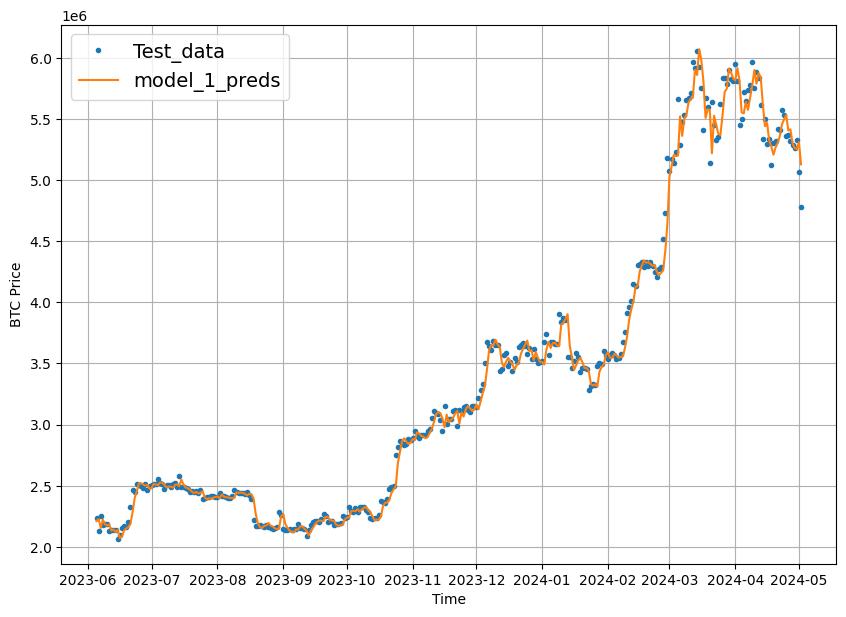

In [ ]:
offset = 30
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past
##data - month

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1798, 1798)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1438, 360, 1438, 360)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 65539.7422


65539.7421875

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 64616.6289


64616.62890625

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

12/12 [==============================] - 0s 3ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 64616.617,
 'mse': 10940960000.0,
 'rmse': 104599.04,
 'mape': 1.7912809,
 'mase': 1.0580884}

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

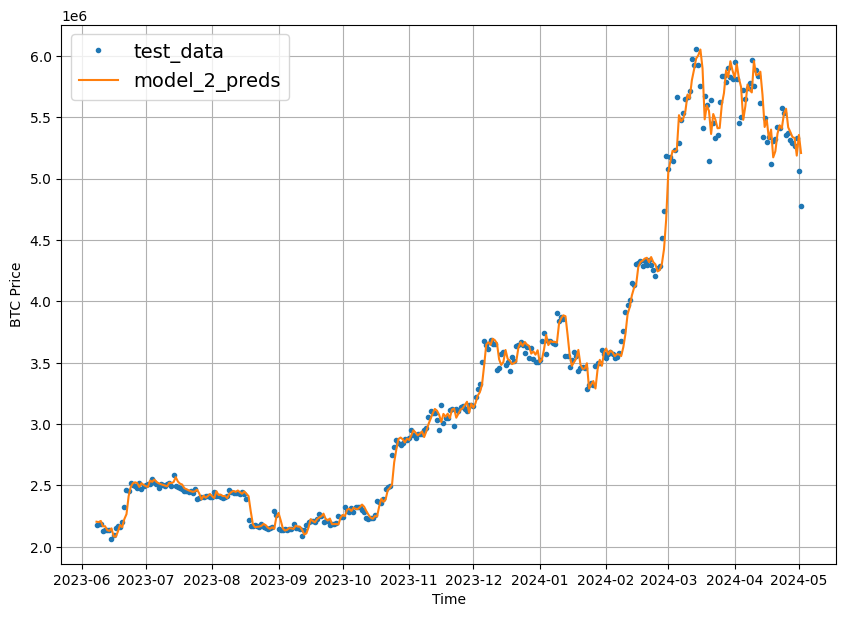

In [ ]:
offset = 30
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1792, 1792)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1433, 359, 1433, 359)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 124597.5469


124597.546875

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 123603.1328


123603.1328125

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[2361432.8, 2388845.5, 2395383.2, 2327722.5, 2396606. , 2391980.8,
        2381195.8],
       [2396119.5, 2418923.5, 2385924.8, 2363572. , 2385464.8, 2429746. ,
        2394903.8],
       [2343923.2, 2416346.5, 2405322.8, 2372814.8, 2376681.2, 2423350. ,
        2371352.2],
       [2374550.5, 2421815.2, 2399628.2, 2375927.8, 2411951.8, 2448070.2,
        2416614.2],
       [2338633.5, 2419860.8, 2409433.2, 2413016.5, 2369182.2, 2423104.8,
        2388650.2]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 123603.13,
 'mse': 36535214000.0,
 'rmse': 142289.8,
 'mape': 3.5116844,
 'mase': 2.0552504}

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 123603.13,
 'mse': 36535214000.0,
 'rmse': 142289.8,
 'mape': 3.5116844,
 'mase': 2.0552504}

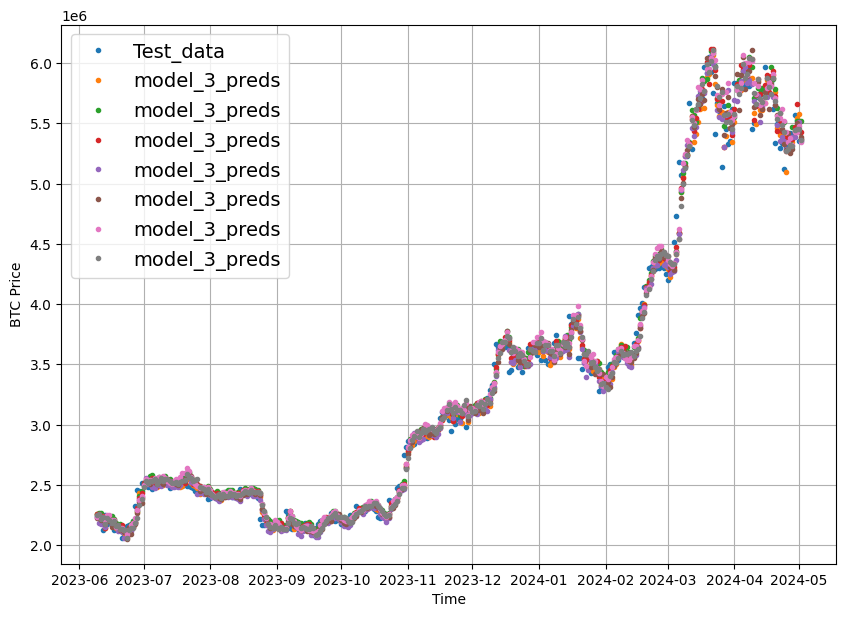

In [ ]:
offset = 30
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

The above plot can be fixed by aggregating the values of 7 days into one.

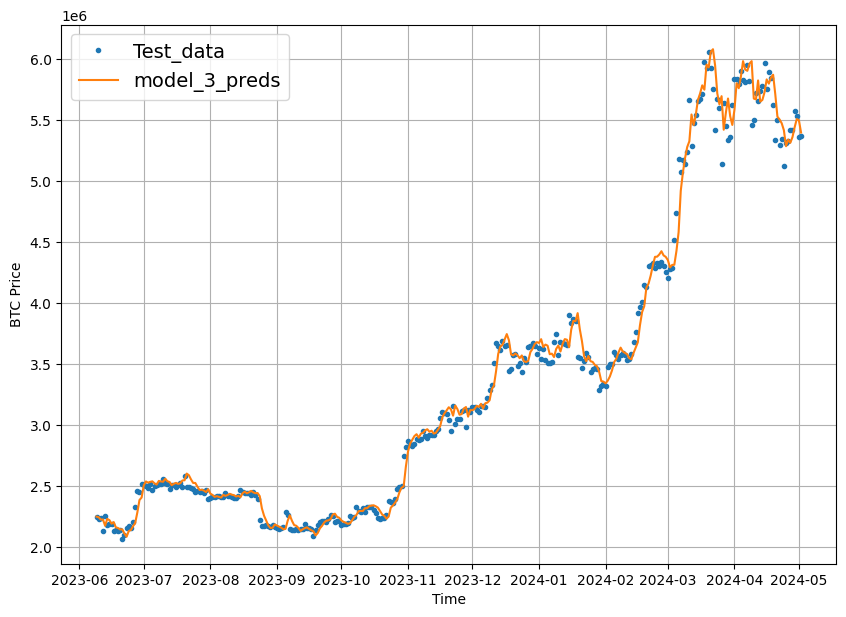

In [ ]:
offset = 30
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look further ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

Plot given below is comparison on the basis of MAE values of the models. SO far our model 1 is performing the best.
NOTE: THE LOWER THE VALUE THE BETTER THE PERFORMANCE.

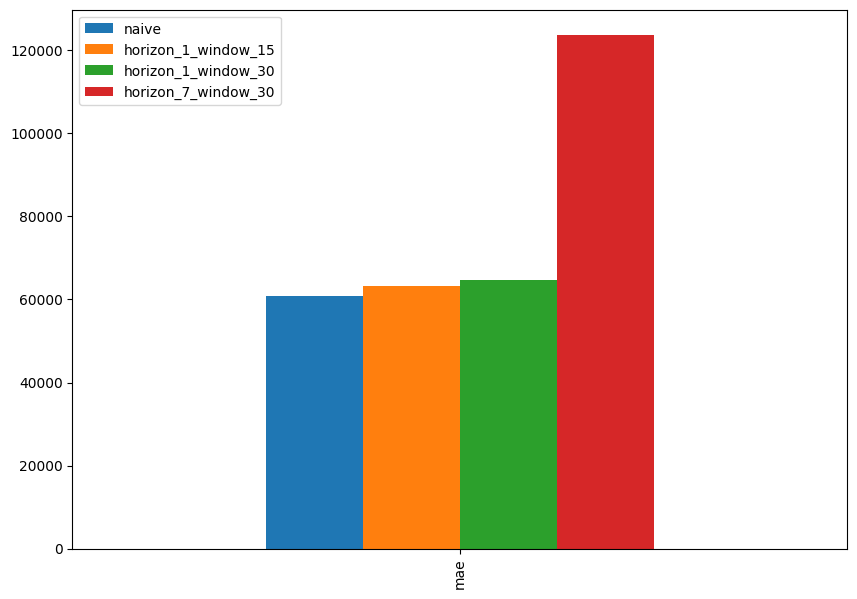

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_15": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

The plot given below is on the basis of MSE values. Still the best performing model is our baseline model.

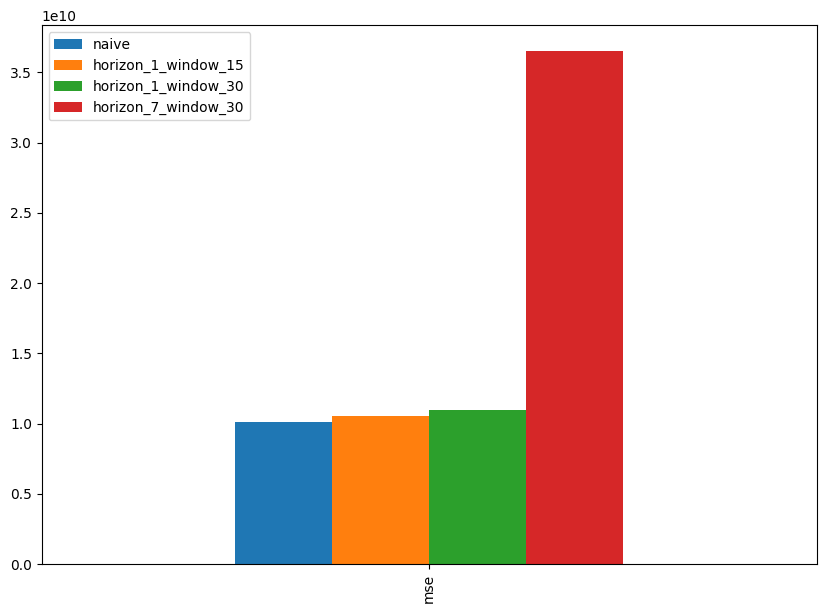

In [ ]:
pd.DataFrame({"naive": naive_results["mse"],
              "horizon_1_window_15": model_1_results["mse"],
              "horizon_1_window_30": model_2_results["mse"],
              "horizon_7_window_30": model_3_results["mse"]}, index=["mse"]).plot(figsize=(10, 7), kind="bar");

Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1821, 1821)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1456, 365, 1456, 365)

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[382256.06]
 [399038.72]
 [403388.5 ]
 [400935.  ]
 [398887.6 ]
 [405856.3 ]
 [417096.94]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 61199.2539


61199.25390625

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2341172.5, 2359429.2, 2364898.2, 2400415. , 2387009.8, 2353379.2,
       2292138.5, 2277490.8, 2260256.8, 2231465. ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 61199.254,
 'mse': 10125702000.0,
 'rmse': 100626.55,
 'mape': 1.7000971,
 'mase': 1.0059891}

Model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 3ms/step - loss: 73173.5078


73173.5078125

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

12/12 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2351002.8, 2352559.2, 2351330.2, 2376179. , 2373037.8, 2358027.2,
       2320942.2, 2297910.2, 2275979.2, 2247746.8], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 73173.516,
 'mse': 13676686000.0,
 'rmse': 116947.37,
 'mape': 2.0258398,
 'mase': 1.2028213}

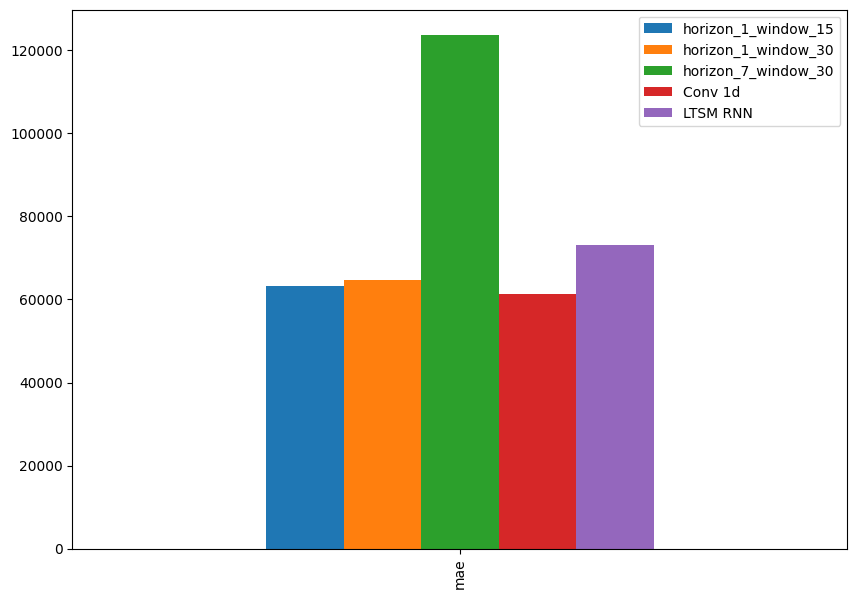

In [ ]:
pd.DataFrame({"horizon_1_window_15": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "Conv 1d": model_4_results["mae"],
              "LTSM RNN": model_5_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

SO far, we have done single variable training (using univariate timeseries).
We are making it multivariate by adding block reward size. Block reward size reduces as we go further along time.

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Close
Date,
2019-05-02,382256.06250
2019-05-03,399038.71875
2019-05-04,403388.50000
2019-05-05,400935.00000
2019-05-06,398887.59375


In [ ]:
# Block reward value
block_reward = 6.25

# Block reward dates (datetime form of the above date stamps)
block_reward_datetime = np.datetime64("2020-05-11")


In [ ]:
# Get date indexes for when to add in different block dates
block_reward_days = (block_reward_datetime - bitcoin_prices.index[0]).days
block_reward_days

375

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[block_reward_days:, -1] = block_reward
bitcoin_prices_block.head()

,Close,block_reward
Date,,
2019-05-02,382256.06250,None
2019-05-03,399038.71875,None
2019-05-04,403388.50000,None
2019-05-05,400935.00000,None
2019-05-06,398887.59375,None


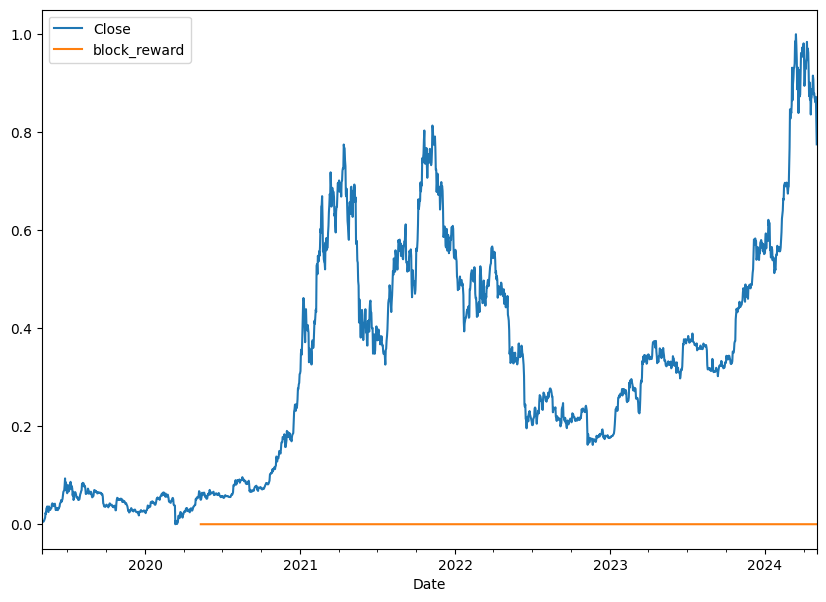

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Close", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Since our data is in a pandas DataFrame, we can leverage the pandas.DataFrame.shift() method to create a windowed multivariate time series.

The shift() method offsets an index by a specified number of periods.



In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Close+{i+1}"] = bitcoin_prices_windowed["Close"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Close,block_reward,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,,
2019-05-02,382256.06250,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-03,399038.71875,None,382256.06250,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-04,403388.50000,None,399038.71875,382256.06250,NaN,NaN,NaN,NaN,NaN
2019-05-05,400935.00000,None,403388.50000,399038.71875,382256.06250,NaN,NaN,NaN,NaN
2019-05-06,398887.59375,None,400935.00000,403388.50000,399038.71875,382256.06250,NaN,NaN,NaN
2019-05-07,405856.31250,None,398887.59375,400935.00000,403388.50000,399038.71875,382256.06250,NaN,NaN
2019-05-08,417096.93750,None,405856.31250,398887.59375,400935.00000,403388.50000,399038.71875,382256.06250,NaN
2019-05-09,433452.21875,None,417096.93750,405856.31250,398887.59375,400935.00000,403388.50000,399038.71875,382256.06250
2019-05-10,446088.84375,None,433452.21875,417096.93750,405856.31250,398887.59375,400935.00000,403388.50000,399038.71875


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Close", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Close"].astype(np.float32)
X.head()

,block_reward,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,
2020-05-11,6.25,661405.1875,724377.5625,742885.0625,753450.3750,706511.8750,683718.3750,674153.1875
2020-05-12,6.25,653199.7500,661405.1875,724377.5625,742885.0625,753450.3750,706511.8750,683718.3750
2020-05-13,6.25,663584.6875,653199.7500,661405.1875,724377.5625,742885.0625,753450.3750,706511.8750
2020-05-14,6.25,699292.6250,663584.6875,653199.7500,661405.1875,724377.5625,742885.0625,753450.3750
2020-05-15,6.25,734847.1875,699292.6250,663584.6875,653199.7500,661405.1875,724377.5625,742885.0625


In [ ]:
# View labels
y.head()


Date
2020-05-11    653199.7500
2020-05-12    663584.6875
2020-05-13    699292.6250
2020-05-14    734847.1875
2020-05-15    707795.6250
Name: Close, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1162, 1162, 291, 291)

In [ ]:
#MODEL6: Dense Model with Multivariate data

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 66651.1172


66651.1171875

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]


10/10 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2493935.8, 2480669.5, 2483800. , 2454009. , 2455170.5, 2449801. ,
       2453955.5, 2446095.2, 2465063.2, 2408737. ], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 66651.13,
 'mse': 11949186000.0,
 'rmse': 109312.336,
 'mape': 1.7085539,
 'mase': 0.9807164}

In [ ]:
model_1_results

{'mae': 63215.145,
 'mse': 10528241000.0,
 'rmse': 102607.22,
 'mape': 1.7586625,
 'mase': 1.0367562}

In [ ]:
#Model 7: N Beats Algorithm

In [ ]:
### Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self,
               input_size,
               theta_size,
               horizon,
               n_neurons,
               n_layers,
               name="NBeatsBlock"):

    super().__init__(name=name)

    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.dense_layers = [
        tf.keras.layers.Dense(n_neurons, activation="relu")
        for _ in range(n_layers)
    ]
    self.theta_layer = tf.keras.layers.Dense(theta_size)

    self.residual_connection = tf.keras.layers.Dense(input_size)

  def _build_graph(self, inputs):
    if not isinstance(inputs, tf.Tensor):
      raise ValueError("Input must be a Tensor.")

    x = inputs
    for layer in self.dense_layers:
      x = layer(x)

    theta = self.theta_layer(x)
    backcast = tf.keras.layers.Dense(self.horizon)(theta)

    residual = self.residual_connection(x)
    block_forecast = tf.keras.layers.Dense(self.horizon)(residual)

    return backcast, block_forecast

  def call(self, inputs):
    backcast, block_forecast = self._build_graph(inputs)
    return backcast, block_forecast###

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: -0.12305182218551636
Forecast: -0.2282460629940033


In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Close
Date,
2019-05-02,382256.06250
2019-05-03,399038.71875
2019-05-04,403388.50000
2019-05-05,400935.00000
2019-05-06,398887.59375


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Close+{i+1}"] = bitcoin_prices_nbeats["Close"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Close,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,
2019-05-09,433452.21875,417096.93750,405856.31250,398887.59375,400935.00000,403388.50000,399038.71875,382256.06250
2019-05-10,446088.84375,433452.21875,417096.93750,405856.31250,398887.59375,400935.00000,403388.50000,399038.71875
2019-05-11,503847.68750,446088.84375,433452.21875,417096.93750,405856.31250,398887.59375,400935.00000,403388.50000
2019-05-12,487595.43750,503847.68750,446088.84375,433452.21875,417096.93750,405856.31250,398887.59375,400935.00000
2019-05-13,551816.62500,487595.43750,503847.68750,446088.84375,433452.21875,417096.93750,405856.31250,398887.59375


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Close", axis=1)
y = bitcoin_prices_nbeats.dropna()["Close"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1456, 1456, 365, 365)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
# Define the NBeatsBlock class
from tensorflow.keras import layers

class NBeatsBlock(layers.Layer):
    def __init__(self, input_size, theta_size, horizon, n_neurons, n_layers, name=None):
        super(NBeatsBlock, self).__init__(name=name)
        self.dense_layers = [layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        self.theta_layer = layers.Dense(theta_size)
        self.horizon = horizon
        self.backcast_dense = layers.Dense(horizon)
        self.block_forecast_dense = layers.Dense(horizon)

    def call(self, inputs):
        x = inputs
        for layer in self.dense_layers:
            x = layer(x)
        theta = self.theta_layer(x)
        backcast = self.backcast_dense(theta)
        residual = inputs - backcast
        block_forecast = self.block_forecast_dense(residual)
        return backcast, block_forecast


# Define constants
INPUT_SIZE = 7
THETA_SIZE = 32
HORIZON = 1
N_NEURONS = 64
N_LAYERS = 4
N_STACKS = 2
N_EPOCHS = 100
train_dataset = train_dataset  # Define your training dataset
test_dataset = test_dataset

# Create the initial NBeatsBlock layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(stack_input)
residuals = stack_input - backcast

# Create stacks of blocks
for i in range(N_STACKS-1):
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                            theta_size=THETA_SIZE,
                                            horizon=HORIZON,
                                            n_neurons=N_NEURONS,
                                            n_layers=N_LAYERS,
                                            name=f"NBeatsBlock_{i}")(residuals)
    residuals = residuals - backcast
    forecast = forecast + block_forecast

# Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fit the model with callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 78202.2266 - mae: 78202.2266 - mse: 14932365312.0000


[78202.2265625, 78202.2265625, 14932365312.0]

In [ ]:
#Model 7: Creating an ensemble (stacking multiple models together)
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 0s 144ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2353460. , 2337837.2, 2440714.5, 2409592.2, 2392860.5, 2400124.5,
       2270719. , 2288762.2, 2270078.2, 2273965. ], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 78202.23,
 'mse': 14932365000.0,
 'rmse': 122198.055,
 'mape': 2.2069645,
 'mase': 1.2854828}

plotting the N-Beats Algorithm

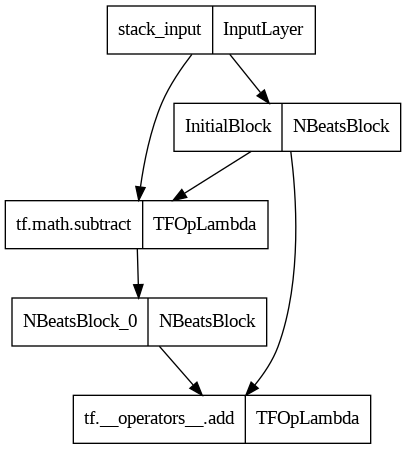

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)


In [ ]:
model_7.save(model_7.name)


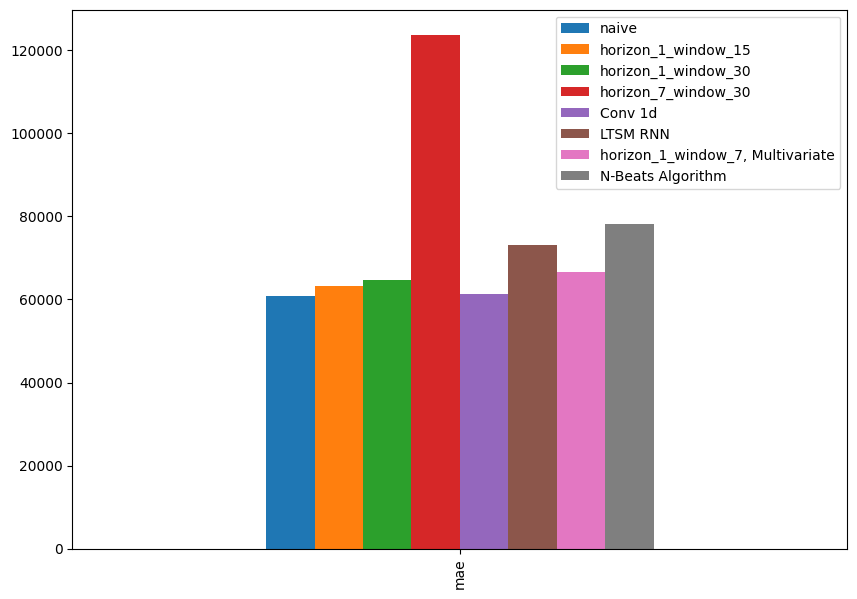

In [ ]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_15": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "Conv 1d": model_4_results["mae"],
              "LTSM RNN": model_5_results["mae"],
              "horizon_1_window_7, Multivariate": model_6_results["mae"],
              "N-Beats Algorithm": model_7_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

conv1D best for now.